## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    silhouette_score,
    r2_score,
    mean_absolute_error,
)
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist

sns.set_theme(context='talk', style='darkgrid')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


## Load the Data

In [2]:
# Adjust the path if your CSV is elsewhere.
DATA_PATH = 'games_metadata_profile.csv'

df = pd.read_csv(DATA_PATH)
print(f"Loaded {len(df)} games")
print("Columns:", df.columns.tolist())
df.head()

Loaded 76557 games
Columns: ['Unnamed: 0', 'GameID', 'Event', 'Site', 'Date', 'Time', 'White', 'WhiteElo', 'WhiteRatingDiff', 'White_is_deleted', 'White_tosViolation', 'White_profile_flag', 'White_createdAt', 'White_playTime_total', 'White_count_all', 'White_title', 'Black', 'BlackElo', 'BlackRatingDiff', 'Black_is_deleted', 'Black_tosViolation', 'Black_profile_flag', 'Black_createdAt', 'Black_playTime_total', 'Black_count_all', 'Black_title', 'Moves', 'TotalMoves', 'ECO', 'Opening', 'TimeControl', 'Result']


,Unnamed: 0,GameID,Event,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,White_tosViolation,White_profile_flag,White_createdAt,White_playTime_total,White_count_all,White_title,Black,BlackElo,BlackRatingDiff,Black_is_deleted,Black_tosViolation,Black_profile_flag,Black_createdAt,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Result
0,0,1,Rated Classical game,https://lichess.org/thHVpOWb,2017.04.30,22:00:22,laserany,1462,10.0,True,False,NaN,NaN,NaN,NaN,NaN,Theache,1455,-10.0,False,False,NaN,1.483452e+12,358763.0,709.0,NaN,e4 {[%eval 0.18] [%clk 0:10:00]} e5 {[%eval 0....,37,C61,Ruy Lopez: Bird Variation,600+0,1-0
1,1,2,Rated Bullet game,https://lichess.org/VkrZh2mi,2017.04.30,22:00:27,aezr777,1384,12.0,False,False,NaN,1.458680e+12,2697009.0,16959.0,NaN,BrilliantZues,1394,-13.0,False,False,NaN,1.424389e+12,501634.0,2610.0,NaN,e4 {[%eval 0.15] [%clk 0:01:00]} d5 {[%eval 0....,49,D00,Blackmar-Diemer Gambit: Zeller Defense,60+0,1-0
2,2,3,Rated Classical tournament https://lichess.org...,https://lichess.org/SBQLVdig,2017.04.30,22:01:00,Parapixel,1895,13.0,False,False,NaN,1.430974e+12,1548280.0,3930.0,NaN,viejero,1955,-15.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.18] [%clk 0:10:00]} c5 {[%eval 0....,103,B27,Sicilian Defense: Hyperaccelerated Dragon,600+0,1-0
3,3,4,Rated Classical game,https://lichess.org/eKevl4x2,2017.04.30,22:01:02,ByWitcher,1511,24.0,False,True,TR,1.488027e+12,144794.0,308.0,NaN,Y_MAKAR,1602,-14.0,False,False,NaN,1.492805e+12,24294725.0,20709.0,NaN,e4 {[%eval 0.25] [%clk 0:10:00]} e5 {[%eval 0....,61,C40,King's Pawn Game: Damiano Defense,600+0,1-0
4,4,5,Rated Blitz game,https://lichess.org/jFT4MHsZ,2017.04.30,22:01:18,Phililipov,1886,-4.0,False,False,FR,1.412112e+12,12036091.0,66074.0,NaN,TiCC,2187,17.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.24] [%clk 0:03:00]} d6 {[%eval 0....,66,B07,Pirc Defense,180+5,0-1


## Data Exploration and Feature Engineering

### Structure of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76557 entries, 0 to 76556
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            76557 non-null  int64  
 1   GameID                76557 non-null  int64  
 2   Event                 76557 non-null  object 
 3   Site                  76557 non-null  object 
 4   Date                  76557 non-null  object 
 5   Time                  76557 non-null  object 
 6   White                 76557 non-null  object 
 7   WhiteElo              76557 non-null  int64  
 8   WhiteRatingDiff       76454 non-null  float64
 9   White_is_deleted      76557 non-null  bool   
 10  White_tosViolation    76557 non-null  bool   
 11  White_profile_flag    22919 non-null  object 
 12  White_createdAt       64158 non-null  float64
 13  White_playTime_total  64043 non-null  float64
 14  White_count_all       64158 non-null  float64
 15  White_title        

### Distribution of Player Ratings

After dropping missing Elo: 76557 games
Maximum Player Rating: 3112
Minimum Player Rating: 760


/var/folders/fg/g6zlnwrn5zsdmtvtz0kn8m0h0000gn/T/ipykernel_36728/1386201190.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_rating_counts = rating_counts_binned.groupby(level=0).sum()


(700, 900]        432
(900, 1100]      4120
(1100, 1300]    15253
(1300, 1500]    32725
(1500, 1700]    40102
(1700, 1900]    33728
(1900, 2100]    18603
(2100, 2300]     6258
(2300, 2500]     1515
(2500, 2700]      307
(2700, 2900]       54
(2900, 3100]       16
dtype: int64

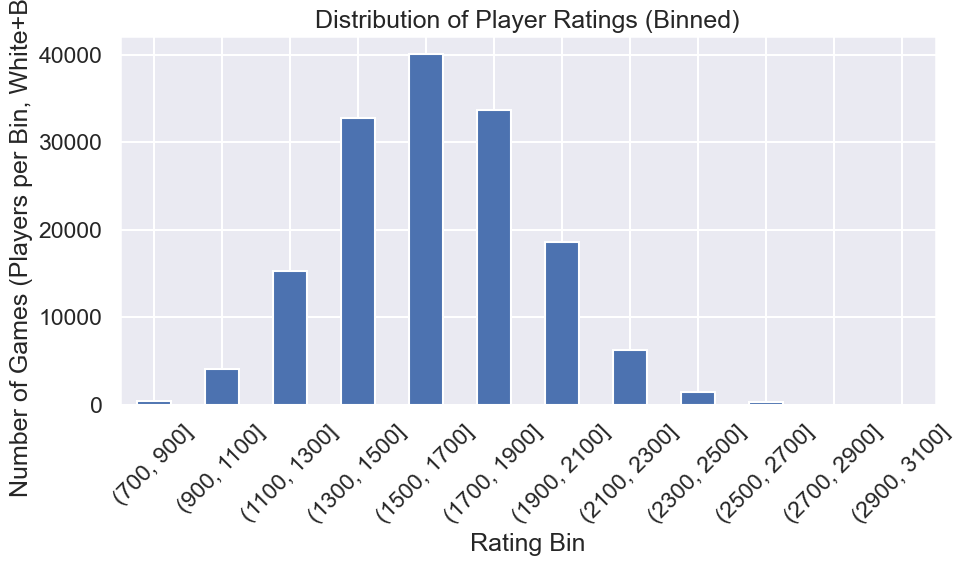

In [4]:
# Convert Elo columns to numeric if they are not already
df['WhiteElo'] = pd.to_numeric(df.get('WhiteElo'), errors='coerce')
df['BlackElo'] = pd.to_numeric(df.get('BlackElo'), errors='coerce')

# Drop games without ratings
df = df.dropna(subset=['WhiteElo', 'BlackElo'])
print(f"After dropping missing Elo: {len(df)} games")

# Combine white and black ratings into one distribution
white_rating_count = df['WhiteElo'].value_counts()
black_rating_count = df['BlackElo'].value_counts()
rating_counts = (
    pd.concat([white_rating_count, black_rating_count], axis=1)
      .fillna(0)
      .astype(int)
)
rating_counts = rating_counts.sum(axis=1)

max_rating = rating_counts.index.max()
min_rating = rating_counts.index.min()
print(f"Maximum Player Rating: {max_rating}")
print(f"Minimum Player Rating: {min_rating}")

# Define rating bins; fall back to min/max if outside 600–3600 range
lower = max(600, int(min_rating // 100 * 100))
upper = min(3600, int((max_rating // 100 + 1) * 100))
rating_bins = np.arange(lower, upper + 1, 200)

rating_counts_binned = rating_counts.copy()
rating_counts_binned.index = pd.cut(rating_counts_binned.index, bins=rating_bins)
merged_rating_counts = rating_counts_binned.groupby(level=0).sum()
display(merged_rating_counts)

plt.figure(figsize=(10, 6))
merged_rating_counts.plot(kind='bar')
plt.title('Distribution of Player Ratings (Binned)')
plt.xlabel('Rating Bin')
plt.ylabel('Number of Games (Players per Bin, White+Black)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Most Popular Openings by ECO Category

#### All Rated Players

All Players:


ECO
C    25087
B    21959
A    17163
D    10367
E     1981
Name: count, dtype: int64

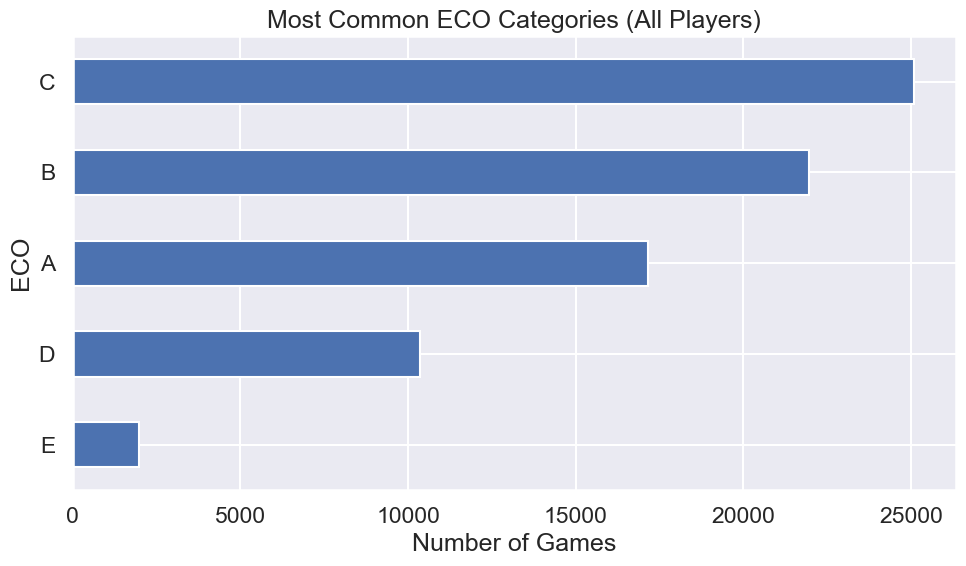

In [5]:
if 'ECO' in df.columns:
    eco_categories = df['ECO'].astype(str).str[0].value_counts()
    print('All Players:')
    display(eco_categories)

    plt.figure(figsize=(10, 6))
    eco_categories.sort_values().plot(kind='barh')
    plt.title('Most Common ECO Categories (All Players)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('ECO column not available.')

#### High Rated Players (2000+)

Players with Rating 2000 and Above:


ECO
B    2405
A    2314
C    1519
D     981
E     390
Name: count, dtype: int64

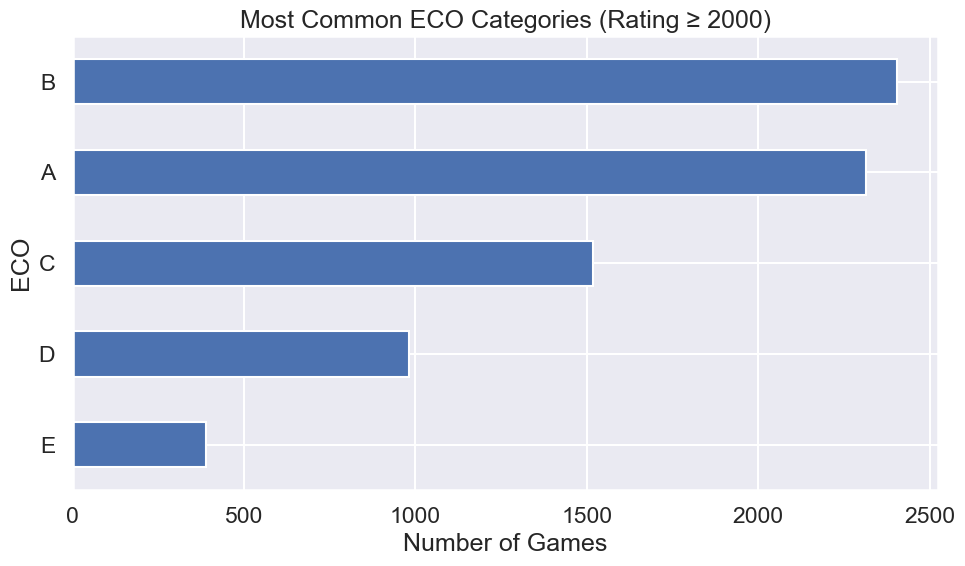

In [6]:
if 'ECO' in df.columns:
    high = df[df['WhiteElo'] >= 2000]
    high_eco_categories = high['ECO'].astype(str).str[0].value_counts()
    print('Players with Rating 2000 and Above:')
    display(high_eco_categories)

    plt.figure(figsize=(10, 6))
    high_eco_categories.sort_values().plot(kind='barh')
    plt.title('Most Common ECO Categories (Rating ≥ 2000)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('ECO column not available.')

#### Mid Rated Players (1201-1999)

Players with Rating 1201-1999:


ECO
C    21359
B    18433
A    13693
D     8739
E     1559
Name: count, dtype: int64

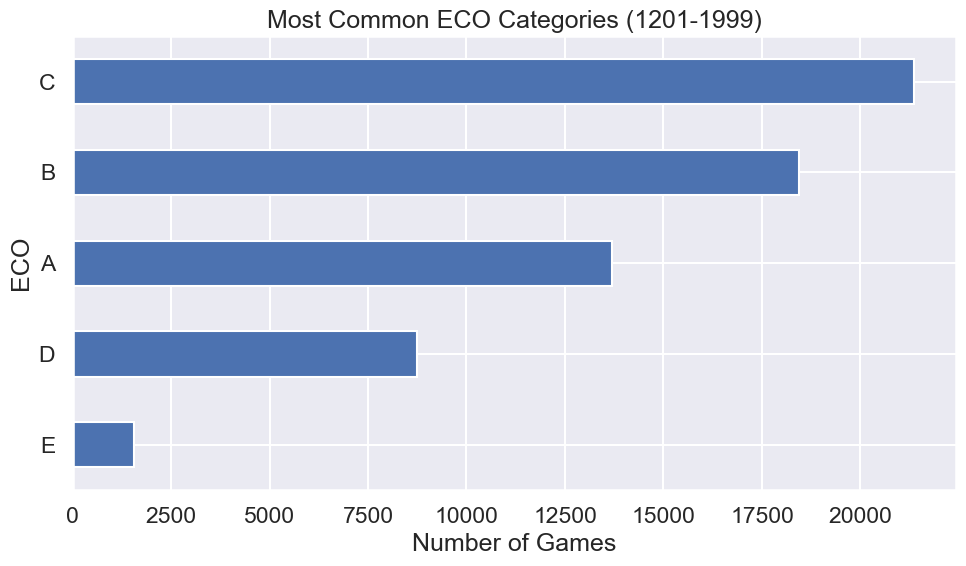

In [7]:
if 'ECO' in df.columns:
    mid = df[(df['WhiteElo'] >= 1201) & (df['WhiteElo'] <= 1999)]
    mid_eco_categories = mid['ECO'].astype(str).str[0].value_counts()
    print('Players with Rating 1201-1999:')
    display(mid_eco_categories)

    plt.figure(figsize=(10, 6))
    mid_eco_categories.sort_values().plot(kind='barh')
    plt.title('Most Common ECO Categories (1201-1999)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('ECO column not available.')

#### Low Rated Players (1200-)

Players with Rating 1200 and Below:


ECO
C    2209
A    1156
B    1121
D     647
E      32
Name: count, dtype: int64

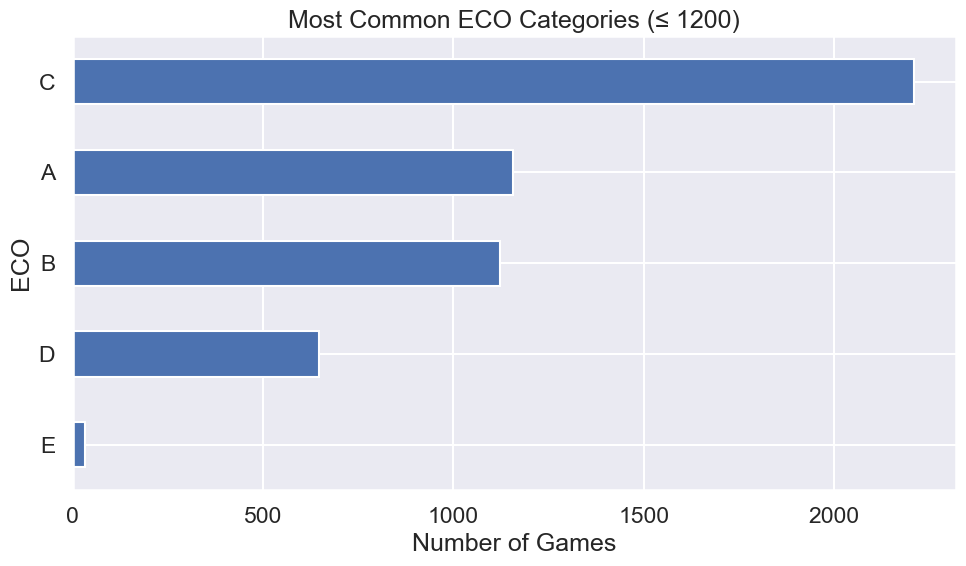

In [8]:
if 'ECO' in df.columns:
    low = df[df['WhiteElo'] <= 1200]
    low_eco_categories = low['ECO'].astype(str).str[0].value_counts()
    print('Players with Rating 1200 and Below:')
    display(low_eco_categories)

    plt.figure(figsize=(10, 6))
    low_eco_categories.sort_values().plot(kind='barh')
    plt.title('Most Common ECO Categories (≤ 1200)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('ECO column not available.')

### Most Popular Base Openings

#### Create BaseOpening Column

In [9]:
if 'Opening' in df.columns:
    df['BaseOpening'] = df['Opening'].astype(str).str.split(':').str[0]
    display(df[['Opening', 'BaseOpening']].head())
else:
    print('Opening column not available; cannot create BaseOpening.')

,Opening,BaseOpening
0,Ruy Lopez: Bird Variation,Ruy Lopez
1,Blackmar-Diemer Gambit: Zeller Defense,Blackmar-Diemer Gambit
2,Sicilian Defense: Hyperaccelerated Dragon,Sicilian Defense
3,King's Pawn Game: Damiano Defense,King's Pawn Game
4,Pirc Defense,Pirc Defense


#### All Rated Players

BaseOpening
Sicilian Defense           9820
French Defense             5103
Queen's Pawn Game          3553
Scandinavian Defense       3398
Italian Game               2956
Caro-Kann Defense          2675
Ruy Lopez                  2630
King's Pawn Game           2429
English Opening            2384
Queen's Gambit Declined    1654
Scotch Game                1482
Modern Defense             1482
Zukertort Opening          1458
Van't Kruijs Opening       1429
Indian Game                1424
Four Knights Game          1083
Bishop's Opening           1037
Hungarian Opening           993
Queen's Gambit Refused      989
Queen's Gambit Accepted     956
Name: count, dtype: int64

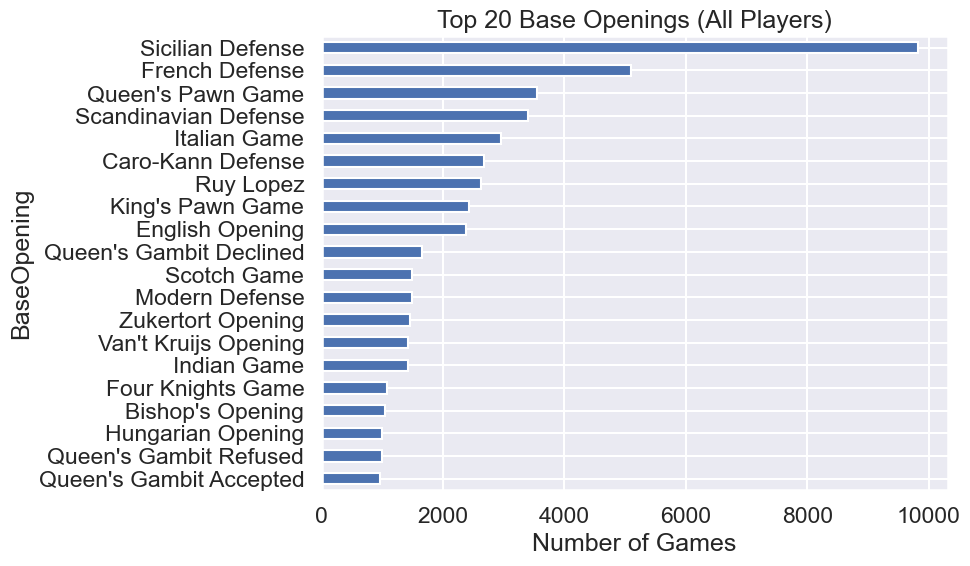

In [10]:
if 'BaseOpening' in df.columns:
    base_counts = df['BaseOpening'].value_counts().head(20)
    display(base_counts)
    plt.figure(figsize=(10, 6))
    base_counts.sort_values().plot(kind='barh')
    plt.title('Top 20 Base Openings (All Players)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('BaseOpening column not available.')

#### High Rated Players (2000+)

BaseOpening
Sicilian Defense           1166
French Defense              536
Caro-Kann Defense           360
English Opening             354
Queen's Pawn Game           291
Scandinavian Defense        265
Ruy Lopez                   230
Zukertort Opening           213
King's Indian Defense       199
Queen's Gambit Declined     190
Indian Game                 184
Modern Defense              178
Italian Game                157
Nimzo-Larsen Attack         148
Slav Defense                128
Hungarian Opening           123
Alekhine Defense            105
King's Indian Attack        103
Scotch Game                 100
Nimzo-Indian Defense         94
Name: count, dtype: int64

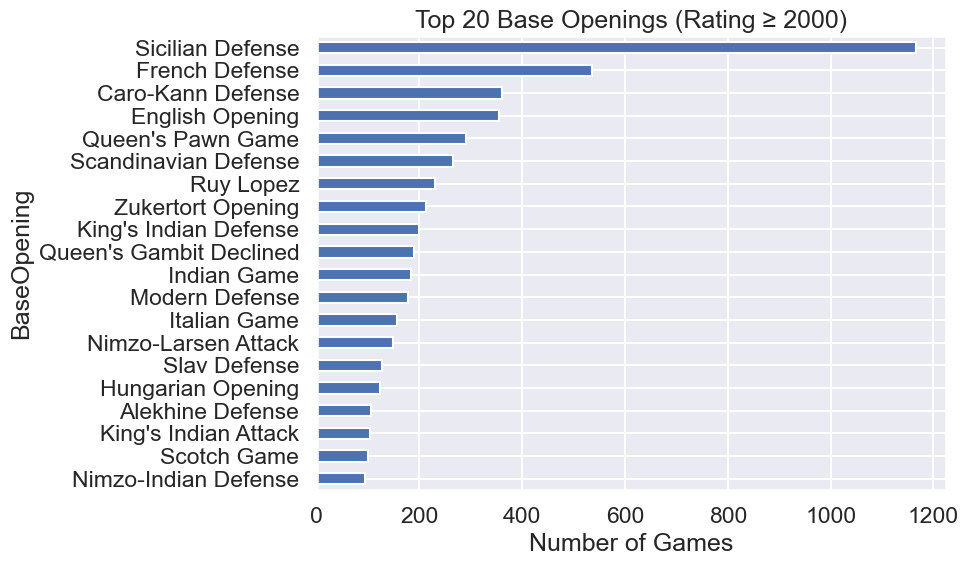

In [11]:
if 'BaseOpening' in df.columns:
    high = df[df['WhiteElo'] >= 2000]
    base_counts_high = high['BaseOpening'].value_counts().head(20)
    display(base_counts_high)
    plt.figure(figsize=(10, 6))
    base_counts_high.sort_values().plot(kind='barh')
    plt.title('Top 20 Base Openings (Rating ≥ 2000)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('BaseOpening column not available.')

#### Mid Rated Players (1201-1999)

BaseOpening
Sicilian Defense           8315
French Defense             4289
Queen's Pawn Game          2981
Scandinavian Defense       2852
Italian Game               2642
Caro-Kann Defense          2241
Ruy Lopez                  2237
English Opening            1928
King's Pawn Game           1885
Queen's Gambit Declined    1400
Scotch Game                1282
Modern Defense             1214
Indian Game                1180
Van't Kruijs Opening       1162
Zukertort Opening          1152
Bishop's Opening            900
Four Knights Game           898
Queen's Gambit Refused      879
Queen's Gambit Accepted     845
Hungarian Opening           793
Name: count, dtype: int64

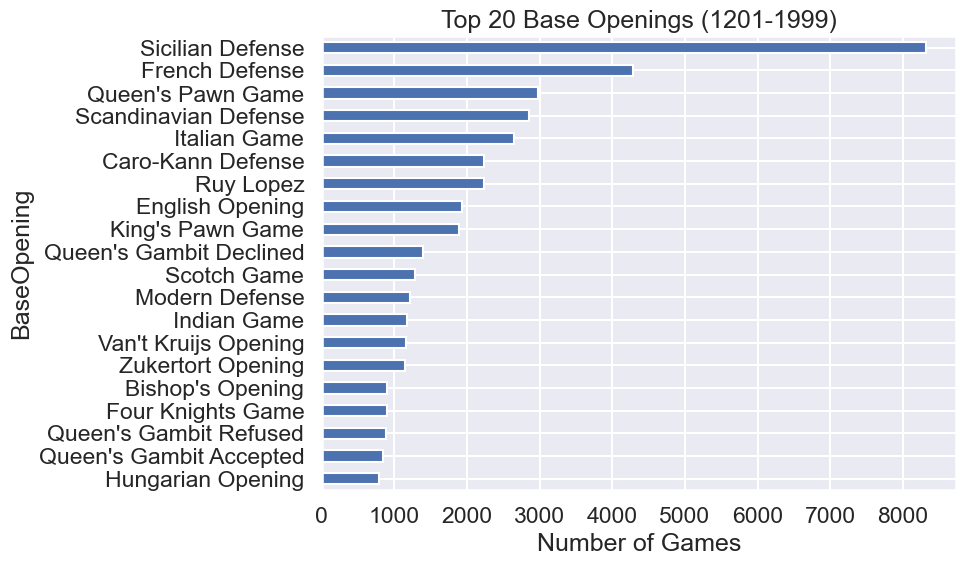

In [12]:
if 'BaseOpening' in df.columns:
    mid = df[(df['WhiteElo'] >= 1201) & (df['WhiteElo'] <= 1999)]
    base_counts_mid = mid['BaseOpening'].value_counts().head(20)
    display(base_counts_mid)
    plt.figure(figsize=(10, 6))
    base_counts_mid.sort_values().plot(kind='barh')
    plt.title('Top 20 Base Openings (1201-1999)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('BaseOpening column not available.')

#### Low Rated Players (1200-)

BaseOpening
King's Pawn Game        508
Sicilian Defense        339
Queen's Pawn Game       281
Scandinavian Defense    281
French Defense          278
Van't Kruijs Opening    203
Ruy Lopez               163
Italian Game            157
Four Knights Game       130
Bishop's Opening        105
English Opening         102
Scotch Game             100
Russian Game             94
Zukertort Opening        93
Modern Defense           90
Queen's Pawn Game #2     88
Alekhine Defense         85
Hungarian Opening        77
Caro-Kann Defense        74
Vienna Game              74
Name: count, dtype: int64

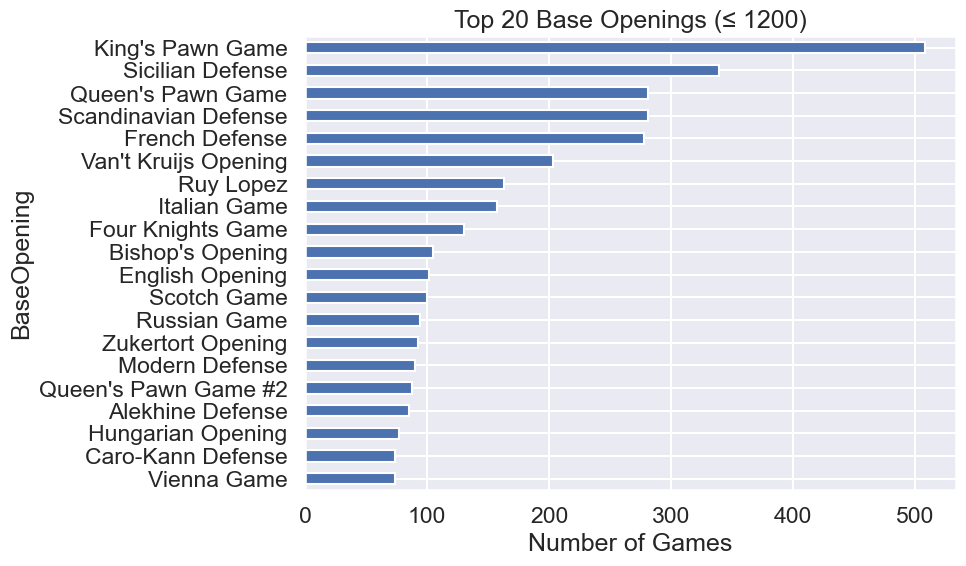

In [13]:
if 'BaseOpening' in df.columns:
    low = df[df['WhiteElo'] <= 1200]
    base_counts_low = low['BaseOpening'].value_counts().head(20)
    display(base_counts_low)
    plt.figure(figsize=(10, 6))
    base_counts_low.sort_values().plot(kind='barh')
    plt.title('Top 20 Base Openings (≤ 1200)')
    plt.xlabel('Number of Games')
    plt.tight_layout()
    plt.show()
else:
    print('BaseOpening column not available.')

### Elo Difference and Relative Elo Difference

In [14]:
# Create EloDiff and RelativeEloDiff as in the original project
df['EloDiff'] = df['WhiteElo'] - df['BlackElo']

# RelativeEloDiff: White rating relative to the median of (WhiteElo, BlackElo), as a %
median_ratings = df[['WhiteElo', 'BlackElo']].median(axis=1)
# Avoid division by zero
median_ratings = median_ratings.replace(0, np.nan)
df['RelativeEloDiff'] = (((df['WhiteElo'] / median_ratings) - 1.0) * 100.0).round(2)
display(df[['WhiteElo', 'BlackElo', 'EloDiff', 'RelativeEloDiff']].head())

,WhiteElo,BlackElo,EloDiff,RelativeEloDiff
0,1462,1455,7,0.24
1,1384,1394,-10,-0.36
2,1895,1955,-60,-1.56
3,1511,1602,-91,-2.92
4,1886,2187,-301,-7.39


#### Binned EloDiff (for later ML use)

In [15]:
# Count distinct EloDiff values
elo_diff_counts = df['EloDiff'].value_counts()
elo_diffs_min = np.min(elo_diff_counts.index)
elo_diffs_max = np.max(elo_diff_counts.index)
elo_diffs_mean = np.mean(elo_diff_counts.index)
elo_diffs_median = np.median(elo_diff_counts.index)
print(
    f'EloDiff:\n  Min: {elo_diffs_min}\n  Max: {elo_diffs_max}\n  '
    f'Mean: {elo_diffs_mean:.2f}\n  Median: {elo_diffs_median}'
)

# Define EloDiff bins similar to original project
elo_diff_bins = np.arange(-1000, 1001, 100)
df['EloDiffBin'] = pd.cut(df['EloDiff'], bins=elo_diff_bins)
display(df[['EloDiff', 'EloDiffBin']].head())

# Aggregate counts per bin
elo_diff_counts_binned = elo_diff_counts.copy()
elo_diff_counts_binned.index = pd.cut(elo_diff_counts_binned.index, bins=elo_diff_bins)
merged_elo_diff_counts = elo_diff_counts_binned.groupby(level=0).sum()
print('\nNumber of Games in Each EloDiff Bin:')
display(merged_elo_diff_counts)

EloDiff:
  Min: -1320
  Max: 1276
  Mean: 5.73
  Median: 3.5


,EloDiff,EloDiffBin
0,7,"(0, 100]"
1,-10,"(-100, 0]"
2,-60,"(-100, 0]"
3,-91,"(-100, 0]"
4,-301,"(-400, -300]"



Number of Games in Each EloDiff Bin:


/var/folders/fg/g6zlnwrn5zsdmtvtz0kn8m0h0000gn/T/ipykernel_36728/3596045390.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_elo_diff_counts = elo_diff_counts_binned.groupby(level=0).sum()


(-1000, -900]       21
(-900, -800]        51
(-800, -700]        92
(-700, -600]       210
(-600, -500]       422
(-500, -400]       819
(-400, -300]      1605
(-300, -200]      3943
(-200, -100]      8961
(-100, 0]        22479
(0, 100]         22286
(100, 200]        8682
(200, 300]        3925
(300, 400]        1504
(400, 500]         775
(500, 600]         372
(600, 700]         218
(700, 800]          84
(800, 900]          40
(900, 1000]         24
Name: count, dtype: int64

#### Binned RelativeEloDiff (for later ML use)

In [16]:
rel_counts = df['RelativeEloDiff'].dropna().value_counts()
rel_min = np.min(rel_counts.index)
rel_max = np.max(rel_counts.index)
rel_mean = np.mean(rel_counts.index)
rel_median = np.median(rel_counts.index)
print(
    f'RelativeEloDiff (%):\n  Min: {rel_min}\n  Max: {rel_max}\n  '
    f'Mean: {rel_mean:.2f}\n  Median: {rel_median}'
)

# Define bins at 5% increments, like the baseline in the project
relative_elo_diff_bins = np.arange(-60, 61, 5)
df['RelativeEloDiffBin'] = pd.cut(df['RelativeEloDiff'], bins=relative_elo_diff_bins)
display(df[['RelativeEloDiff', 'RelativeEloDiffBin']].head())

RelativeEloDiff (%):
  Min: -41.54
  Max: 43.22
  Mean: 0.00
  Median: -0.07


,RelativeEloDiff,RelativeEloDiffBin
0,0.24,"(0, 5]"
1,-0.36,"(-5, 0]"
2,-1.56,"(-5, 0]"
3,-2.92,"(-5, 0]"
4,-7.39,"(-10, -5]"


## Subsample the Data for Machine Learning Models

In [17]:
# In the original project they subsample to ~5M games. Here we just take 50% (or less) to keep training fast.
frac = 0.5 if len(df) > 20000 else 1.0
df_reduced = df.sample(frac=frac, random_state=69)
print(f'Subsampled the data to {len(df_reduced)} games (frac={frac}).')
df_reduced.head()

Subsampled the data to 38278 games (frac=0.5).


,Unnamed: 0,GameID,Event,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,White_tosViolation,White_profile_flag,White_createdAt,White_playTime_total,White_count_all,White_title,Black,BlackElo,BlackRatingDiff,Black_is_deleted,Black_tosViolation,Black_profile_flag,Black_createdAt,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Result,BaseOpening,EloDiff,RelativeEloDiff,EloDiffBin,RelativeEloDiffBin
46297,6434,6435,Rated Blitz game,https://lichess.org/ZZBzhsLR,2017.05.19,13:43:52,Mist3rDragon,1563,13.0,False,False,GB,1.484139e+12,4224375.0,19441.0,NaN,nishat786,1658,-36.0,False,False,NaN,1.491632e+12,738876.0,3527.0,NaN,e4 {[%eval 0.29] [%clk 0:05:00]} c6 {[%eval 0....,49,B13,Caro-Kann Defense: Panov Attack #2,300+3,1-0,Caro-Kann Defense,-95,-2.95,"(-100, 0]","(-5, 0]"
11543,4736,4737,Rated Classical game,https://lichess.org/0jJ0TUVt,2017.05.05,15:38:25,mandibulin,2111,-4.0,False,False,CL,1.370125e+12,8203301.0,15627.0,NaN,cameleon2200,2408,3.0,False,False,FR,1.489174e+12,6055818.0,14516.0,NaN,e4 {[%eval 0.38] [%clk 0:10:00]} Nf6 {[%eval 0...,54,B03,Alekhine Defense: Exchange Variation,600+3,0-1,Alekhine Defense,-297,-6.57,"(-300, -200]","(-10, -5]"
36868,3433,3434,Rated Bullet game,https://lichess.org/o0jOYdqT,2017.05.15,17:20:49,wrgdfgfdgdfgfd,1773,-9.0,False,False,NaN,1.489008e+12,146958.0,1305.0,NaN,Pyuria,1818,10.0,False,False,US,1.467439e+12,8490067.0,91652.0,NaN,g3 {[%eval -0.21] [%clk 0:01:00]} d5 {[%eval 0...,84,A00,Hungarian Opening: Slav Formation,60+0,0-1,Hungarian Opening,-45,-1.25,"(-100, 0]","(-5, 0]"
63625,4115,4116,Rated Classical game,https://lichess.org/cpunvQi8,2017.05.26,15:51:56,bradiaga,1899,-11.0,False,False,GE,1.382375e+12,11656268.0,19837.0,NaN,venegeance,1909,10.0,True,False,NaN,NaN,NaN,NaN,NaN,e4 {[%eval 0.14] [%clk 0:15:00]} g6 {[%eval 0....,106,B06,Modern Defense: Mongredien Defense #2,900+0,0-1,Modern Defense,-10,-0.26,"(-100, 0]","(-5, 0]"
63831,4321,4322,Rated Bullet game,https://lichess.org/2JFI9HcO,2017.05.26,17:07:49,blackscandinavian,1237,-12.0,False,False,FR,1.494361e+12,4042596.0,14717.0,NaN,Lootz10,1189,13.0,False,False,UA,1.495488e+12,1803424.0,3950.0,NaN,e4 {[%eval 0.14] [%clk 0:02:00]} e5 {[%eval 0....,56,C62,Ruy Lopez: Steinitz Defense,120+1,0-1,Ruy Lopez,48,1.98,"(0, 100]","(0, 5]"


## Prediction of Game Results Using Classifiers

### Prepare Target Variable (Game Result)

In [18]:
# Map Result to numeric label: 1 = White win, 0 = Black win, 0.5 = draw
result_map = {'1-0': 1.0, '0-1': 0.0, '1/2-1/2': 0.5, '½-½': 0.5}
df_reduced['Result_numeric'] = df_reduced.get('Result').map(result_map)
# Drop missing targets
df_reduced = df_reduced.dropna(subset=['Result_numeric'])
print(df_reduced['Result_numeric'].value_counts())

Result_numeric
1.0    19037
0.0    18276
0.5      965
Name: count, dtype: int64


In [19]:
# Ensure we have a clean, categorical target for classification
# Drop rows with missing Result or unmapped values
df_reduced = df_reduced.dropna(subset=['Result'])

# Map the original string result to integer class labels
result_label_map = {
    '0-1': 0,        # Black win
    '1/2-1/2': 1,    # Draw
    '½-½': 1,        # Also treat this as draw if present
    '1-0': 2         # White win
}

df_reduced['Result_class'] = df_reduced['Result'].map(result_label_map)

# Drop rows where mapping failed (e.g. weird results)
df_reduced = df_reduced.dropna(subset=['Result_class'])
df_reduced['Result_class'] = df_reduced['Result_class'].astype(int)

print(df_reduced['Result_class'].value_counts())

Result_class
2    19037
0    18276
1      965
Name: count, dtype: int64


### Decision Tree Classifier

In [20]:
from typing import List, Dict

def run_decision_tree_experiment(df_in: pd.DataFrame, feature_cols: List[str], label_col: str,
                                 experiment_name: str) -> Dict[str, float]:
    """Train/test DecisionTree on given features and print accuracy & weighted F1."""
    print(f"\n=== Decision Tree Experiment: {experiment_name} ===")
    df_model = df_in.dropna(subset=feature_cols + [label_col]).copy()
    if len(df_model) < 100:
        print('Not enough data after dropping NA; skipping.')
        return {'accuracy': np.nan, 'f1': np.nan}

    X = df_model[feature_cols]
    y = df_model[label_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=69, stratify=y if y.nunique() > 1 else None
    )

    clf = DecisionTreeClassifier(random_state=69)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {acc:.3f}")
    print(f"Weighted F1: {f1:.3f}")
    return {'accuracy': acc, 'f1': f1}


#### Baseline Model – Only RelativeEloDiffBin

In [21]:
df_reduced['RelativeEloDiffBin_code'] = df_reduced['RelativeEloDiffBin'].cat.codes
dt_results = {}
dt_results['RelativeEloDiffBin'] = run_decision_tree_experiment(
    df_reduced,
    ['RelativeEloDiffBin_code'],
    'Result_class',              # <-- use the discrete class labels
    'RelativeEloDiffBin only',
)


=== Decision Tree Experiment: RelativeEloDiffBin only ===
Accuracy: 0.589
Weighted F1: 0.582


#### BaseOpening, RelativeEloDiff, and TimeControl (Representative Spec)

In [22]:
# Encode BaseOpening and TimeControl as category codes for the model
if 'BaseOpening' in df_reduced.columns:
    df_reduced['BaseOpening_code'] = df_reduced['BaseOpening'].astype('category').cat.codes
if 'TimeControl' in df_reduced.columns:
    df_reduced['TimeControl_code'] = df_reduced['TimeControl'].astype('category').cat.codes

feature_cols = []
for col in ['BaseOpening_code', 'RelativeEloDiff', 'TimeControl_code', 'WhiteElo', 'BlackElo']:
    if col in df_reduced.columns:
        feature_cols.append(col)

dt_results['BaseOpening+RelDiff+TimeControl+Ratings'] = run_decision_tree_experiment(
    df_reduced,
    feature_cols,
    'Result_class',
    'BaseOpening + RelativeEloDiff + TimeControl + Elo',
)


=== Decision Tree Experiment: BaseOpening + RelativeEloDiff + TimeControl + Elo ===
Accuracy: 0.507
Weighted F1: 0.507


### Random Forest Classifier

In [23]:
def run_random_forest_experiment(df_in: pd.DataFrame, feature_cols: List[str], label_col: str,
                                 experiment_name: str) -> Dict[str, float]:
    print(f"\n=== Random Forest Experiment: {experiment_name} ===")
    df_model = df_in.dropna(subset=feature_cols + [label_col]).copy()
    if len(df_model) < 100:
        print('Not enough data after dropping NA; skipping.')
        return {'accuracy': np.nan, 'f1': np.nan}

    X = df_model[feature_cols]
    y = df_model[label_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=69, stratify=y if y.nunique() > 1 else None
    )

    clf = RandomForestClassifier(n_estimators=200, random_state=69, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {acc:.3f}")
    print(f"Weighted F1: {f1:.3f}")
    return {'accuracy': acc, 'f1': f1}


#### Baseline Model – Only RelativeEloDiff

In [27]:
rf_results = {}
rf_results['RelativeEloDiff'] = run_random_forest_experiment(
    df_reduced,
    ['RelativeEloDiff'],
    'Result_class',
    'RelativeEloDiff only',
)


=== Random Forest Experiment: RelativeEloDiff only ===
Accuracy: 0.557
Weighted F1: 0.549


#### BaseOpening, RelativeEloDiff, TimeControl, and Elo (Representative Spec)

In [28]:
rf_results['BaseOpening+RelDiff+TimeControl+Ratings'] = run_random_forest_experiment(
    df_reduced,
    feature_cols,
    'Result_class',
    'BaseOpening + RelativeEloDiff + TimeControl + Elo',
)


=== Random Forest Experiment: BaseOpening + RelativeEloDiff + TimeControl + Elo ===
Accuracy: 0.563
Weighted F1: 0.556


## Linear Regression Analysis of the Relationship Between Opening Popularity and Game Results

### Calculation of Proportions of Game Results Per Base Opening

In [42]:
if 'BaseOpening' in df_reduced.columns:
    # Count games per BaseOpening
    base_opening_counts = df_reduced['BaseOpening'].value_counts()

    # Threshold similar to original (10,000), but adapt downwards if dataset is small
    threshold = 10000
    if (base_opening_counts >= threshold).sum() == 0:
        threshold = max(100, int(len(df_reduced) * 0.001))
    popular_openings = base_opening_counts[base_opening_counts >= threshold].index
    print(f'Using BaseOpening popularity threshold: {threshold} games')

    filtered_df = df_reduced[df_reduced['BaseOpening'].isin(popular_openings)]
    print(f'Filtered to {len(filtered_df)} games across {filtered_df["BaseOpening"].nunique()} base openings.')

    # --- NEW: build counts and percentages in one go, avoiding the earlier pivot issues ---

    # Count results per (BaseOpening, Result)
    counts = (
        filtered_df
        .groupby(['BaseOpening', 'Result'])
        .size()
        .unstack(fill_value=0)   # columns = result values like '1-0', '0-1', '1/2-1/2'
    )

    # Handle alternative draw notation if present
    if '½-½' in counts.columns and '1/2-1/2' not in counts.columns:
        counts['1/2-1/2'] = counts['½-½']
    if '1/2-1/2' not in counts.columns:
        counts['1/2-1/2'] = 0
    if '1-0' not in counts.columns:
        counts['1-0'] = 0
    if '0-1' not in counts.columns:
        counts['0-1'] = 0

    # Ensure consistent column order
    counts = counts[['1-0', '0-1', '1/2-1/2']]

    # Total games per BaseOpening
    total_games = counts.sum(axis=1)

    # Convert to percentages
    result_percentages_pivot = counts.div(total_games, axis=0) * 100.0

    # Add NumberOfGames and bring BaseOpening back as a column
    result_percentages_pivot['NumberOfGames'] = total_games
    result_percentages_pivot = result_percentages_pivot.reset_index()  # BaseOpening from index -> column

    # Drop very generic openings if present
    result_percentages_pivot_sorted = (
        result_percentages_pivot[
            ~result_percentages_pivot['BaseOpening'].isin([
                '?', "King's Pawn Game", "Queen's Pawn Game",
            ])
        ]
        .sort_values('NumberOfGames', ascending=False)
        .reset_index(drop=True)
    )

    display(result_percentages_pivot_sorted.head())

else:
    result_percentages_pivot_sorted = None
    print('BaseOpening column not available.')

Using BaseOpening popularity threshold: 100 games
Filtered to 34658 games across 63 base openings.


Result,BaseOpening,1-0,0-1,1/2-1/2,NumberOfGames
0,Sicilian Defense,46.033025,50.745066,3.221909,4966
1,French Defense,47.586757,49.621061,2.792182,2507
2,Scandinavian Defense,51.885099,45.960503,2.154399,1671
3,Italian Game,51.771654,45.800525,2.427822,1524
4,Caro-Kann Defense,46.222222,50.666667,3.111111,1350


### All Rated Players – Popularity vs Result Rates

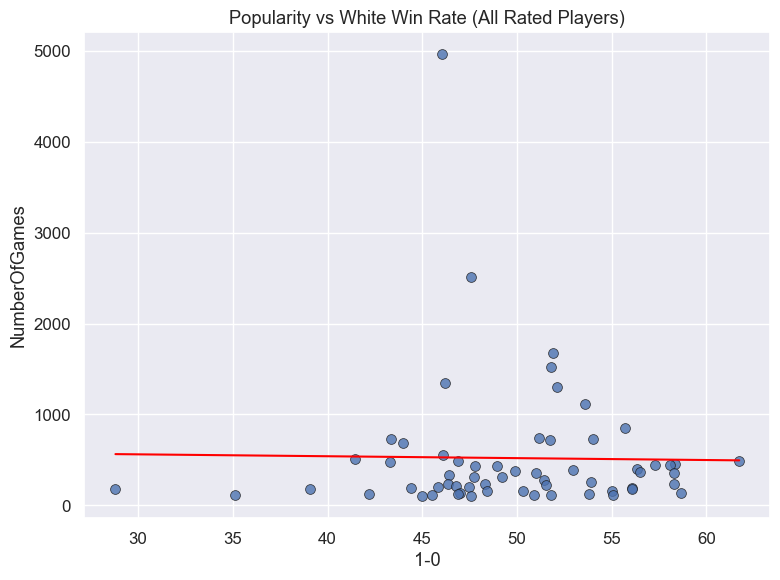

R2 Score: 0.0003
Mean Absolute Error: 398.83


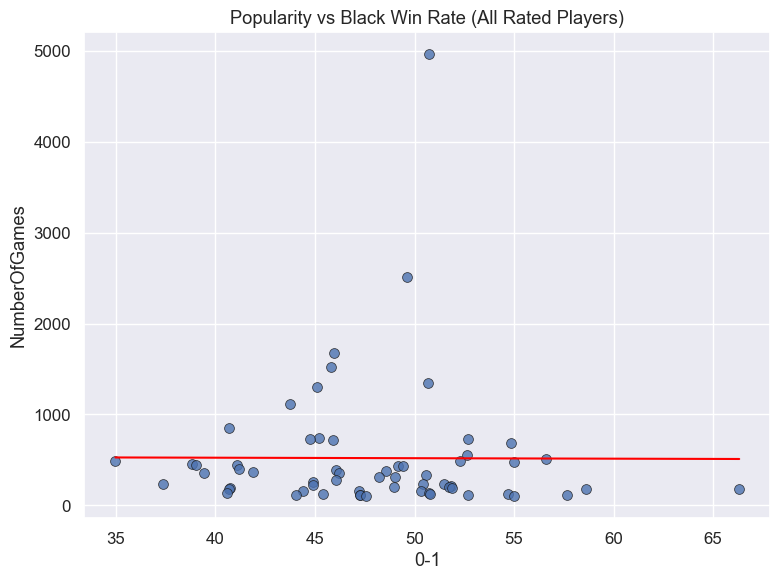

R2 Score: 0.0000
Mean Absolute Error: 398.90


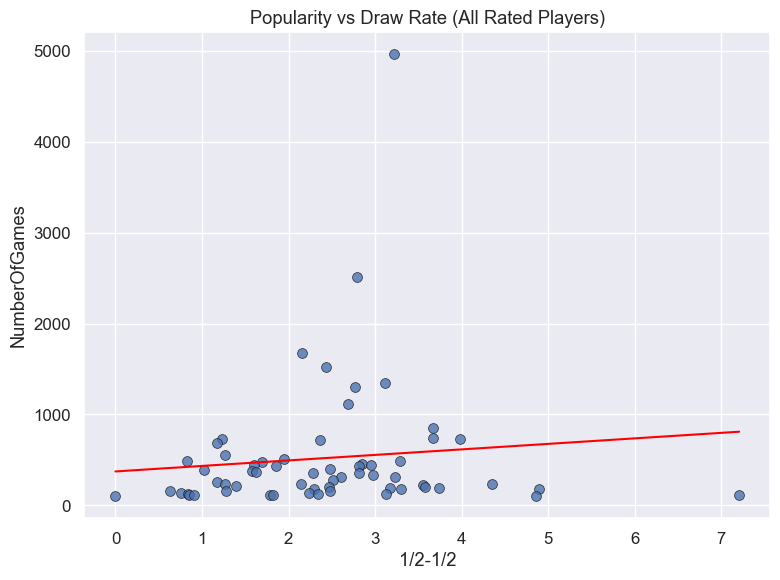

R2 Score: 0.0106
Mean Absolute Error: 396.58


In [43]:
if result_percentages_pivot_sorted is not None and not result_percentages_pivot_sorted.empty:
    def run_linear_regression(x_col: str, y_col: str, title: str):
        regression_data = result_percentages_pivot_sorted[[x_col, y_col]].dropna()
        if regression_data.empty:
            print(f'No data for regression: {x_col} vs {y_col}')
            return
        lr = LinearRegression()
        X = regression_data[[y_col]]
        y = regression_data[x_col]
        lr.fit(X, y)

        sns.set_theme(font_scale=1.1)
        plt.figure(figsize=(8, 6))
        scatter = sns.scatterplot(
            x=y_col,
            y=x_col,
            data=regression_data,
            s=50,
            edgecolor='k',
            alpha=0.8,
        )
        sns.lineplot(
            x=regression_data[y_col],
            y=lr.predict(X),
            color='red',
        )
        scatter.set_title(title)
        plt.tight_layout()
        plt.show()

        print(f'R2 Score: {r2_score(y, lr.predict(X)):.4f}')
        print(f'Mean Absolute Error: {mean_absolute_error(y, lr.predict(X)):.2f}')

    run_linear_regression('NumberOfGames', '1-0', 'Popularity vs White Win Rate (All Rated Players)')
    run_linear_regression('NumberOfGames', '0-1', 'Popularity vs Black Win Rate (All Rated Players)')
    run_linear_regression('NumberOfGames', '1/2-1/2', 'Popularity vs Draw Rate (All Rated Players)')
else:
    print('No result_percentages_pivot_sorted data available for regression.')

### Rating Group-specific Regressions (High / Mid / Low)

[High Rated] Using threshold 500, 1 popular base openings.
[Mid Rated] Using threshold 500, 15 popular base openings.
[Low Rated] Using threshold 500, 0 popular base openings.

=== High Rated ===


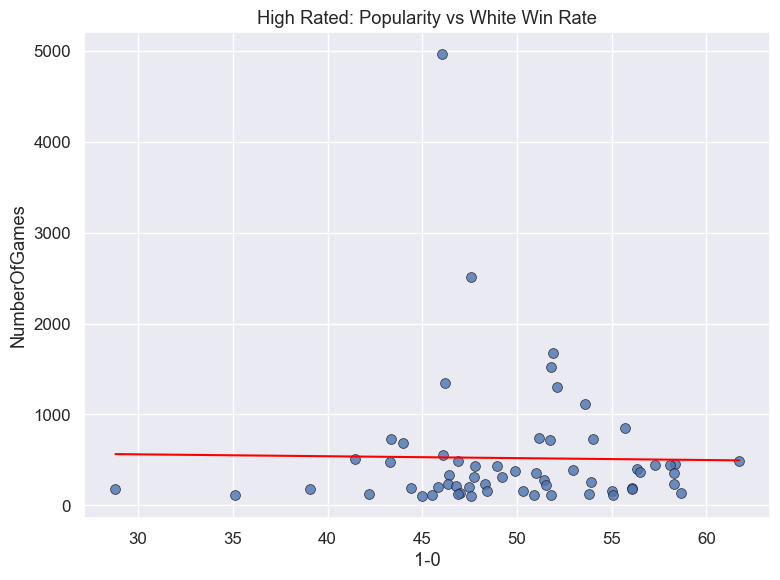

R2 Score: 0.0003
Mean Absolute Error: 398.83


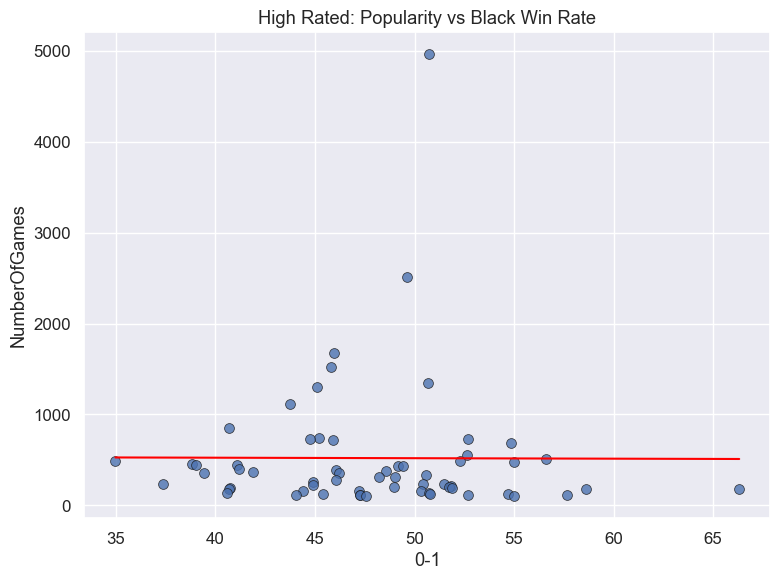

R2 Score: 0.0000
Mean Absolute Error: 398.90


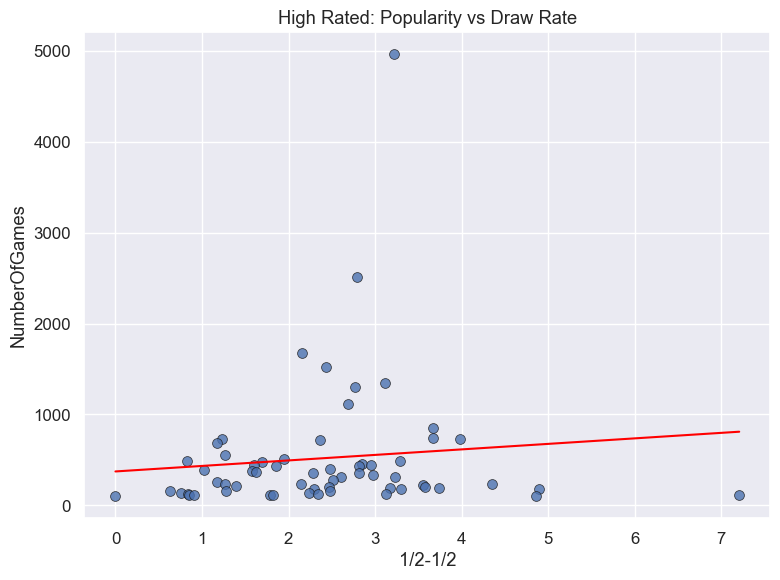

R2 Score: 0.0106
Mean Absolute Error: 396.58

=== Mid Rated ===


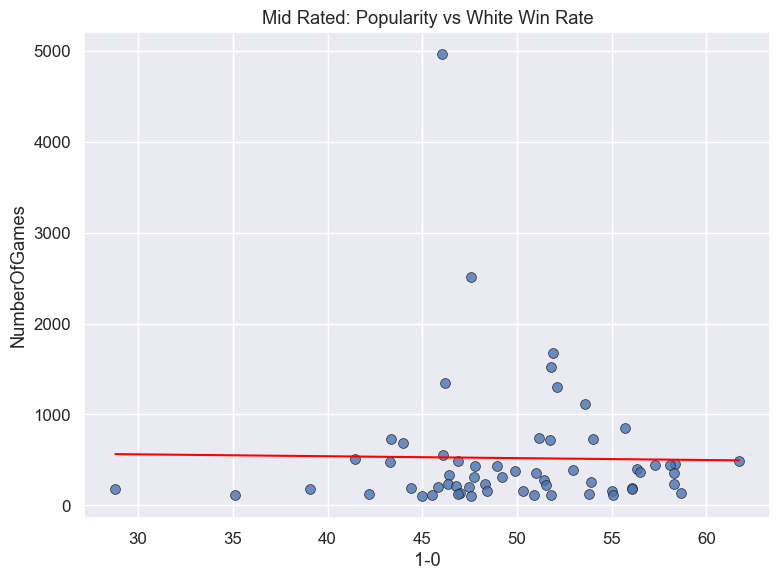

R2 Score: 0.0003
Mean Absolute Error: 398.83


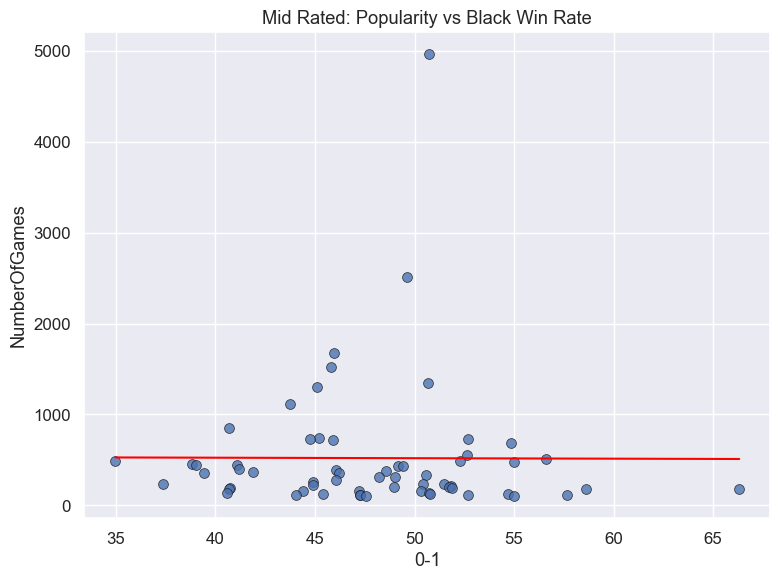

R2 Score: 0.0000
Mean Absolute Error: 398.90


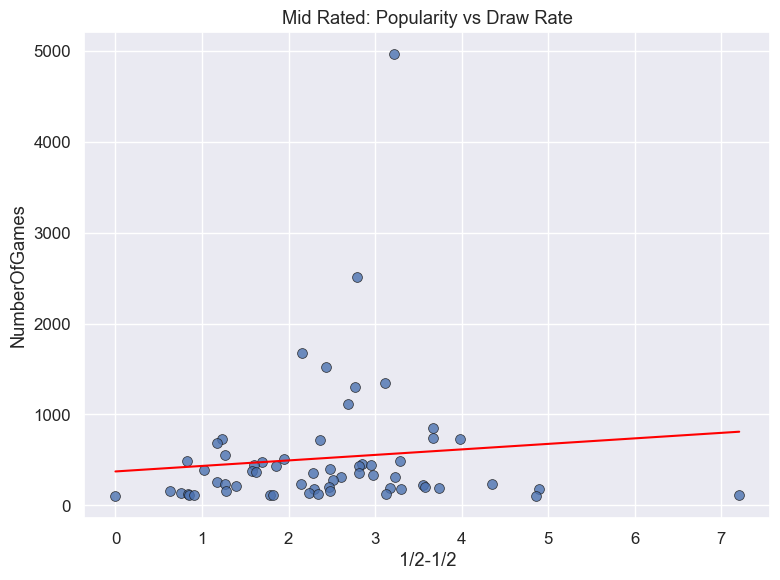

R2 Score: 0.0106
Mean Absolute Error: 396.58
No data to regress for Low Rated.


In [44]:
def compute_base_opening_result_table(df_group: pd.DataFrame, label: str):
    if 'BaseOpening' not in df_group.columns:
        print(f'BaseOpening column not available for {label}.')
        return None

    # Require some minimum games per base opening
    counts = df_group['BaseOpening'].value_counts()
    threshold = 5000
    if (counts >= threshold).sum() == 0:
        threshold = max(500, int(len(df_group) * 0.001))
    popular = counts[counts >= threshold].index
    print(f'[{label}] Using threshold {threshold}, {len(popular)} popular base openings.')
    if len(popular) == 0:
        return None

    filtered = df_group[df_group['BaseOpening'].isin(popular)]

    # --- Build result table directly (safer than pivot/reset_index) ---

    # Counts of each result per BaseOpening
    result_counts = (
        filtered
        .groupby(['BaseOpening', 'Result'])
        .size()
        .unstack(fill_value=0)   # columns = '1-0', '0-1', '1/2-1/2', maybe '½-½'
    )

    # Handle alternate draw notation if present
    if '½-½' in result_counts.columns and '1/2-1/2' not in result_counts.columns:
        result_counts['1/2-1/2'] = result_counts['½-½']
    if '1/2-1/2' not in result_counts.columns:
        result_counts['1/2-1/2'] = 0
    if '1-0' not in result_counts.columns:
        result_counts['1-0'] = 0
    if '0-1' not in result_counts.columns:
        result_counts['0-1'] = 0

    # Ensure consistent column order
    result_counts = result_counts[['1-0', '0-1', '1/2-1/2']]

    # Total games per BaseOpening
    total = result_counts.sum(axis=1)

    # Convert to percentages
    pivot = result_counts.div(total, axis=0) * 100.0

    # Add NumberOfGames and bring BaseOpening back as a column
    pivot['NumberOfGames'] = total
    pivot = pivot.reset_index()  # BaseOpening from index -> column

    # Drop generic / unwanted base openings
    pivot_sorted = (
        pivot[
            ~pivot['BaseOpening'].isin([
                '?', "King's Pawn Game", "Queen's Pawn Game",
            ])
        ]
        .sort_values('NumberOfGames', ascending=False)
        .reset_index(drop=True)
    )

    return pivot_sorted


if 'BaseOpening' in df_reduced.columns:
    high = df_reduced[df_reduced['WhiteElo'] >= 2000]
    mid = df_reduced[(df_reduced['WhiteElo'] >= 1201) & (df_reduced['WhiteElo'] <= 1999)]
    low = df_reduced[df_reduced['WhiteElo'] <= 1200]

    tables = {
        'High Rated': compute_base_opening_result_table(high, 'High Rated'),
        'Mid Rated': compute_base_opening_result_table(mid, 'Mid Rated'),
        'Low Rated': compute_base_opening_result_table(low, 'Low Rated'),
    }

    for label, table in tables.items():
        if table is None or table.empty:
            print(f'No data to regress for {label}.')
            continue
        print(f"\n=== {label} ===")
        result_percentages_pivot_sorted_rg = table
        run_linear_regression('NumberOfGames', '1-0', f'{label}: Popularity vs White Win Rate')
        run_linear_regression('NumberOfGames', '0-1', f'{label}: Popularity vs Black Win Rate')
        run_linear_regression('NumberOfGames', '1/2-1/2', f'{label}: Popularity vs Draw Rate')
else:
    print('BaseOpening column not available; skipping rating-group regressions.')

## Cluster Analysis of Openings by Game Results

### Optimisation of K-Means Clustering

Number of base openings to cluster: 61
k=3, silhouette=0.4592
k=4, silhouette=0.5294
k=5, silhouette=0.5169
k=6, silhouette=0.4482
k=7, silhouette=0.4459
k=8, silhouette=0.3902
k=9, silhouette=0.4043
k=10, silhouette=0.3987


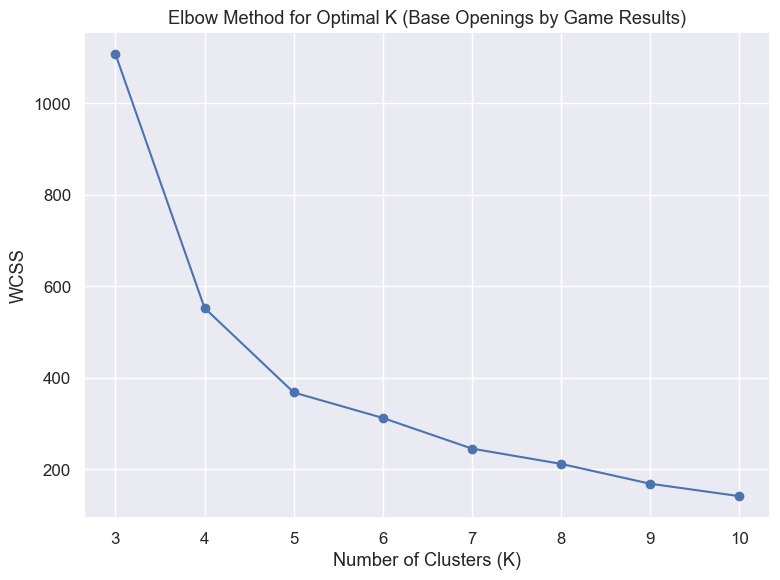

,Number of Clusters,Silhouette Score
0,3,0.459199
1,4,0.529402
2,5,0.516859
3,6,0.448224
4,7,0.445909
5,8,0.390198
6,9,0.404279
7,10,0.398725


In [45]:
if result_percentages_pivot_sorted is not None and not result_percentages_pivot_sorted.empty:
    clustering_data = result_percentages_pivot_sorted[['1-0', '1/2-1/2', '0-1']]
    clustering_data_pd = pd.DataFrame(clustering_data)

    n_samples = len(clustering_data_pd)
    print(f"Number of base openings to cluster: {n_samples}")

    # Need at least 3 samples to meaningfully try k >= 2
    if n_samples < 3:
        print("Not enough base openings to run clustering (need at least 3).")
    else:
        min_clusters = 3
        # 🔑 cap max_clusters by n_samples - 1
        max_clusters = min(10, n_samples - 1)

        wcss_vals = []
        silhouette_score_vals = {}

        for k in range(min_clusters, max_clusters + 1):
            if k >= n_samples:
                # Just in case, skip invalid k
                continue

            kmeans = KMeans(n_clusters=k, init='k-means++', random_state=69)
            kmeans.fit(clustering_data_pd)
            wcss_vals.append(kmeans.inertia_)

            labels = kmeans.labels_
            n_labels = len(np.unique(labels))
            # Silhouette requires 2 <= n_labels <= n_samples - 1
            if n_labels > 1 and n_labels < n_samples:
                score = silhouette_score(clustering_data_pd, labels)
                silhouette_score_vals[k] = score
                print(f"k={k}, silhouette={score:.4f}")
            else:
                print(f"k={k}: cannot compute silhouette (n_labels={n_labels}, n_samples={n_samples})")

        # Plot elbow only for the ks we actually used
        if wcss_vals:
            used_ks = list(range(min_clusters, min_clusters + len(wcss_vals)))
            plt.figure(figsize=(8, 6))
            plt.plot(used_ks, wcss_vals, marker='o')
            plt.title('Elbow Method for Optimal K (Base Openings by Game Results)')
            plt.xlabel('Number of Clusters (K)')
            plt.ylabel('WCSS')
            plt.xticks(used_ks)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        if silhouette_score_vals:
            table_of_silhouette_scores = (
                pd.DataFrame.from_dict(silhouette_score_vals, orient='index', columns=['Silhouette Score'])
                  .reset_index()
                  .rename(columns={'index': 'Number of Clusters'})
            )
            display(table_of_silhouette_scores)
        else:
            print("No valid silhouette scores computed.")
else:
    print('No result_percentages_pivot_sorted data available; skipping clustering.')


### Implementation of K-Means Clustering

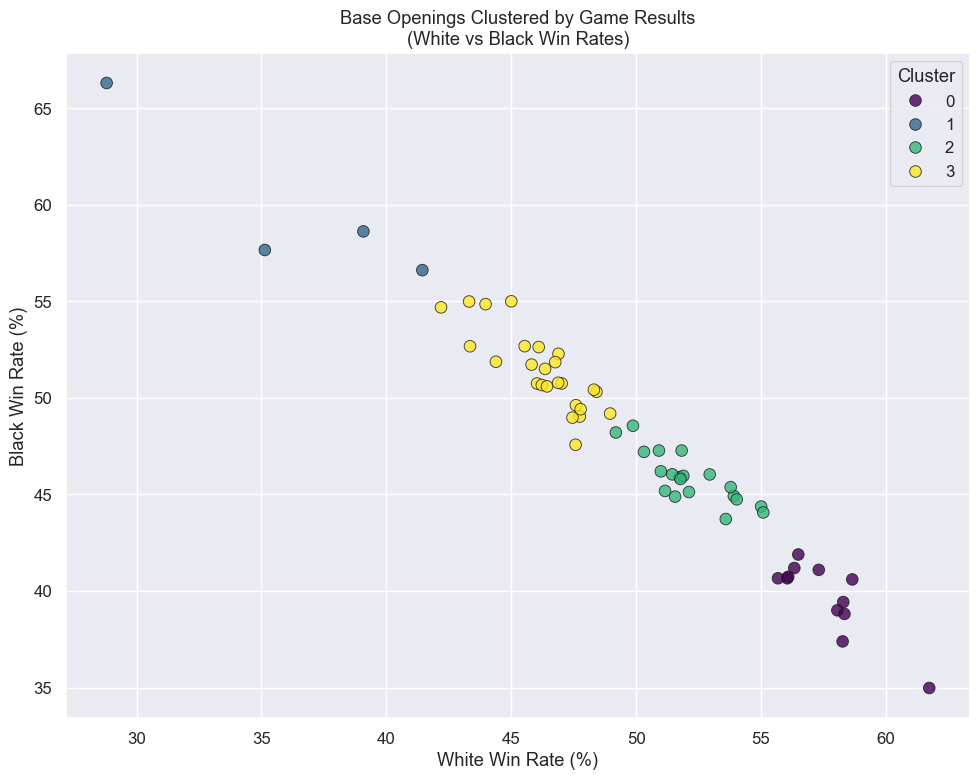

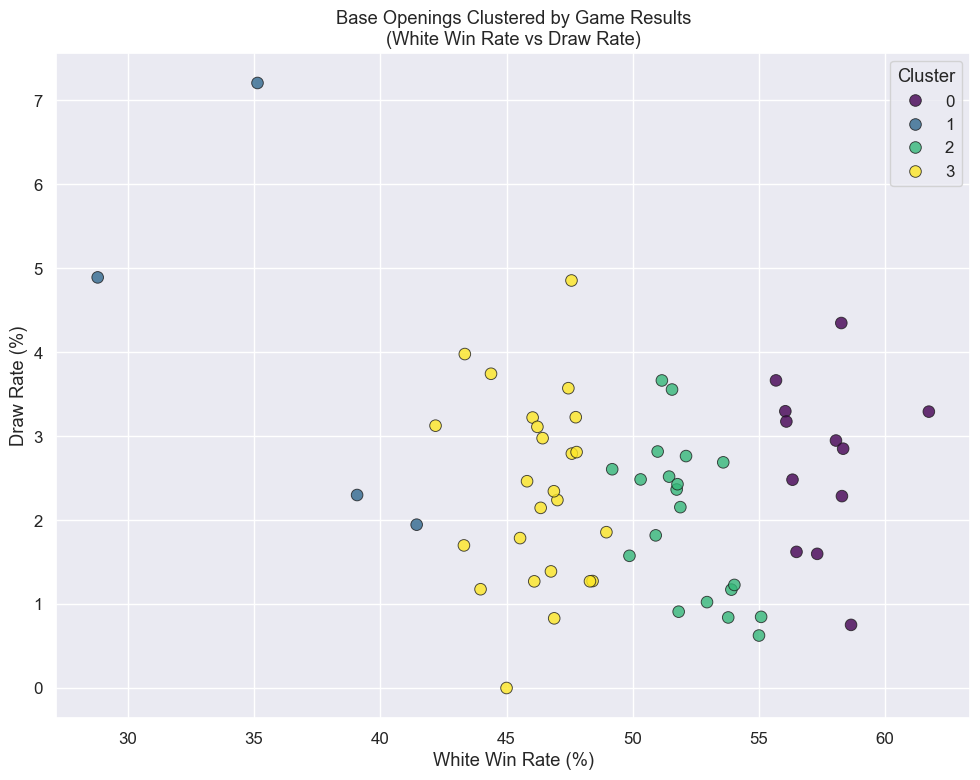

Silhouette Score: 0.5294
WCSS: 552.52


In [46]:
if result_percentages_pivot_sorted is not None and not result_percentages_pivot_sorted.empty:
    clustering_data_pd = pd.DataFrame(
        result_percentages_pivot_sorted[['1-0', '1/2-1/2', '0-1']]
    )
    kmeans = KMeans(n_clusters=4, init='k-means++', random_state=69)
    kmeans.fit(clustering_data_pd)
    kmeans_silhouette_score = silhouette_score(clustering_data_pd, kmeans.labels_)
    kmeans_wcss = kmeans.inertia_

    result_percentages_pivot_sorted['Cluster'] = kmeans.labels_
    result_percentages_pivot_sorted_cluster = result_percentages_pivot_sorted.sort_values('Cluster')

    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='1-0',
        y='0-1',
        hue='Cluster',
        data=result_percentages_pivot_sorted_cluster,
        palette='viridis',
        s=70,
        edgecolor='k',
        alpha=0.8,
    )
    scatter.set(xlabel='White Win Rate (%)', ylabel='Black Win Rate (%)')
    scatter.set_title('Base Openings Clustered by Game Results\n(White vs Black Win Rates)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='1-0',
        y='1/2-1/2',
        hue='Cluster',
        data=result_percentages_pivot_sorted_cluster,
        palette='viridis',
        s=70,
        edgecolor='k',
        alpha=0.8,
    )
    scatter.set(xlabel='White Win Rate (%)', ylabel='Draw Rate (%)')
    scatter.set_title('Base Openings Clustered by Game Results\n(White Win Rate vs Draw Rate)')
    plt.tight_layout()
    plt.show()

    print(f'Silhouette Score: {kmeans_silhouette_score:.4f}')
    print(f'WCSS: {kmeans_wcss:.2f}')
else:
    print('No result_percentages_pivot_sorted data available; skipping clustering.')

## Cluster Analysis of Openings by the Mean Difference of Results in Variations

### Calculation of Proportions of Game Results Per Opening Variation

In [52]:
if 'Opening' in df_reduced.columns and 'BaseOpening' in df_reduced.columns:
    opening_counts = df_reduced['Opening'].value_counts()
    # Original threshold 5000; adapt if needed
    threshold_opening = 5000
    if (opening_counts >= threshold_opening).sum() == 0:
        threshold_opening = max(100, int(len(df_reduced) * 0.001))

    popular_openings = opening_counts[opening_counts >= threshold_opening].index
    print(f'Using Opening popularity threshold: {threshold_opening} games')

    filtered_df_opening = df_reduced[df_reduced['Opening'].isin(popular_openings)]
    print(
        f"Filtered to {len(filtered_df_opening)} games across "
        f"{filtered_df_opening['Opening'].nunique()} openings."
    )

    # --- Safer aggregation without pivot/reset_index ---

    # Count results per (Opening, Result)
    result_counts_opening = (
        filtered_df_opening
        .groupby(['Opening', 'Result'])
        .size()
        .unstack(fill_value=0)  # columns = '1-0', '0-1', '1/2-1/2', maybe '½-½'
    )

    # Handle alternate draw notation if present
    if '½-½' in result_counts_opening.columns and '1/2-1/2' not in result_counts_opening.columns:
        result_counts_opening['1/2-1/2'] = result_counts_opening['½-½']
    if '1/2-1/2' not in result_counts_opening.columns:
        result_counts_opening['1/2-1/2'] = 0
    if '1-0' not in result_counts_opening.columns:
        result_counts_opening['1-0'] = 0
    if '0-1' not in result_counts_opening.columns:
        result_counts_opening['0-1'] = 0

    # Ensure consistent column order
    result_counts_opening = result_counts_opening[['1-0', '0-1', '1/2-1/2']]

    # Total games per Opening
    total_games_opening = result_counts_opening.sum(axis=1)

    # Convert counts to percentages
    result_percentages_pivot_opening = result_counts_opening.div(
        total_games_opening, axis=0
    ) * 100.0

    # Add NumberOfGames and bring Opening back as a column
    result_percentages_pivot_opening['NumberOfGames'] = total_games_opening
    result_percentages_pivot_opening = result_percentages_pivot_opening.reset_index()  # Opening from index -> column

    # Attach BaseOpening for each Opening
    opening_to_base = (
        df_reduced[['Opening', 'BaseOpening']]
        .drop_duplicates()
        .set_index('Opening')['BaseOpening']
    )
    result_percentages_pivot_opening['BaseOpening'] = result_percentages_pivot_opening['Opening'].map(opening_to_base)

    # Drop generic base openings if present and sort
    result_percentages_pivot_opening_sorted = (
        result_percentages_pivot_opening[
            ~result_percentages_pivot_opening['BaseOpening'].isin([
                '?', "King's Pawn Game", "Queen's Pawn Game",
            ])
        ]
        .sort_values('NumberOfGames', ascending=False)
        .reset_index(drop=True)
    )

    display(result_percentages_pivot_opening_sorted.head())

else:
    result_percentages_pivot_opening_sorted = None
    print('Opening/BaseOpening columns not available; skipping variation-level analysis.')


Using Opening popularity threshold: 100 games
Filtered to 16640 games across 72 openings.


Result,Opening,1-0,0-1,1/2-1/2,NumberOfGames,BaseOpening
0,Van't Kruijs Opening,43.970588,54.852941,1.176471,680,Van't Kruijs Opening
1,Scandinavian Defense: Mieses-Kotroc Variation,56.500000,42.666667,0.833333,600,Scandinavian Defense
2,Sicilian Defense,39.372822,56.620209,4.006969,574,Sicilian Defense
3,Modern Defense,51.072125,47.563353,1.364522,513,Modern Defense
4,Caro-Kann Defense,47.749511,50.880626,1.369863,511,Caro-Kann Defense


### Calculation of Mean Euclidean Distances of Results Between Variations

In [53]:
if result_percentages_pivot_opening_sorted is not None and not result_percentages_pivot_opening_sorted.empty:
    def calculate_mean_euclidean_distance_by_result(group: pd.DataFrame) -> float:
        features = group[['1-0', '0-1', '1/2-1/2']].values
        if features.shape[0] <= 1:
            return np.nan
        distances = pdist(features, metric='euclidean')
        return distances.mean()

    mean_distances = result_percentages_pivot_opening_sorted.groupby('BaseOpening').apply(
        calculate_mean_euclidean_distance_by_result
    )
    mean_distances_df = mean_distances.reset_index(name='MeanEuclideanDistance')
    mean_distances_sorted = mean_distances_df.sort_values('MeanEuclideanDistance', ascending=False)
    mean_distances_sorted = mean_distances_sorted.dropna(subset=['MeanEuclideanDistance']).reset_index(drop=True)
    display(mean_distances_sorted.head(10))

    mean_distances_sorted_asc = mean_distances_df.sort_values('MeanEuclideanDistance', ascending=True)
    mean_distances_sorted_asc = mean_distances_sorted_asc.dropna(subset=['MeanEuclideanDistance']).reset_index(drop=True)
    display(mean_distances_sorted_asc.head(10))
else:
    mean_distances_sorted = None
    mean_distances_sorted_asc = None
    print('No variation-level result table available.')

/var/folders/fg/g6zlnwrn5zsdmtvtz0kn8m0h0000gn/T/ipykernel_36728/3127406766.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean_distances = result_percentages_pivot_opening_sorted.groupby('BaseOpening').apply(


,BaseOpening,MeanEuclideanDistance
0,Bishop's Opening,17.341380
1,French Defense,14.917195
2,Caro-Kann Defense,12.389436
3,Italian Game,12.251102
4,Sicilian Defense,11.590203
5,Ruy Lopez,10.643679
6,Scandinavian Defense,8.768739
7,Zukertort Opening,6.916833
8,Queen's Gambit Accepted,4.379996
9,Bird Opening,1.147213


,BaseOpening,MeanEuclideanDistance
0,Bird Opening,1.147213
1,Queen's Gambit Accepted,4.379996
2,Zukertort Opening,6.916833
3,Scandinavian Defense,8.768739
4,Ruy Lopez,10.643679
5,Sicilian Defense,11.590203
6,Italian Game,12.251102
7,Caro-Kann Defense,12.389436
8,French Defense,14.917195
9,Bishop's Opening,17.341380


### Visualisation of Euclidean Distances Between Variations of Base Openings

Not enough variations to plot distances for Van't Kruijs Opening.


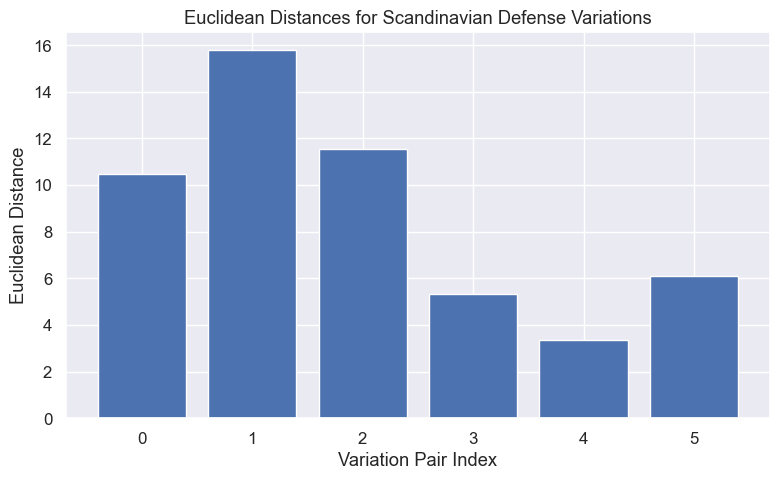

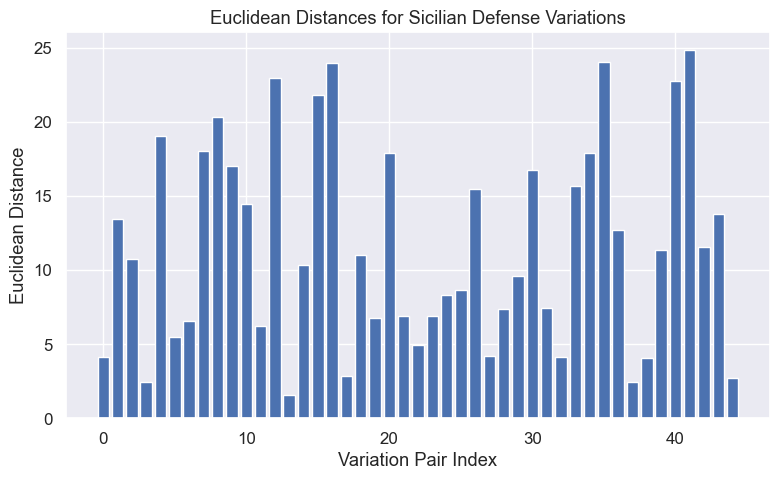

Not enough variations to plot distances for Modern Defense.


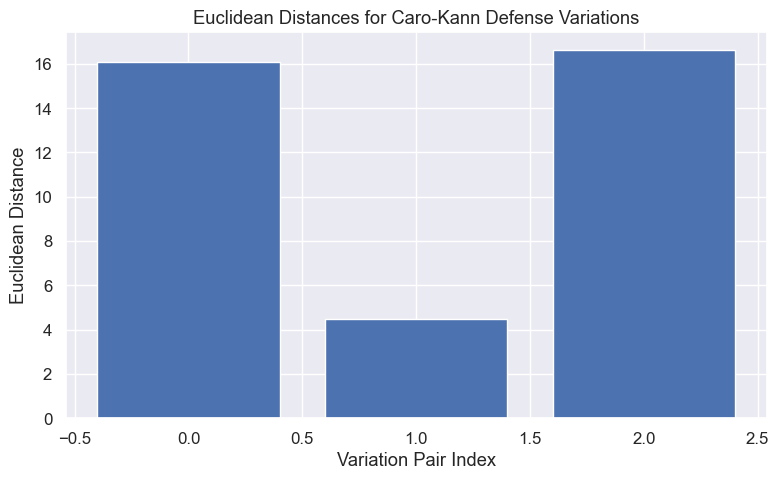

In [54]:
if result_percentages_pivot_opening_sorted is not None and not result_percentages_pivot_opening_sorted.empty:
    def calculate_euclidean_distance_by_result(group: pd.DataFrame):
        features = group[['1-0', '0-1', '1/2-1/2']].values
        if features.shape[0] <= 1:
            return np.array([])
        distances = pdist(features, metric='euclidean')
        return distances

    def plot_euclidean_distances_bar_chart(base_opening_name: str, distances: np.ndarray):
        if distances.size == 0:
            print(f'Not enough variations to plot distances for {base_opening_name}.')
            return
        sns.set_theme(font_scale=1.1)
        plt.figure(figsize=(8, 5))
        x = np.arange(len(distances))
        y = distances
        plt.bar(x, y)
        plt.xlabel('Variation Pair Index')
        plt.ylabel('Euclidean Distance')
        plt.title(f'Euclidean Distances for {base_opening_name} Variations')
        plt.tight_layout()
        plt.show()

    # Example base openings to inspect – change names based on what exists in your data
    example_base_openings = result_percentages_pivot_opening_sorted['BaseOpening'].unique()[:5]
    for base_opening_name in example_base_openings:
        filtered_data = result_percentages_pivot_opening_sorted[
            result_percentages_pivot_opening_sorted['BaseOpening'] == base_opening_name
        ]
        distances = calculate_euclidean_distance_by_result(filtered_data)
        plot_euclidean_distances_bar_chart(base_opening_name, distances)
else:
    print('No variation-level result table available for Euclidean distance visualisation.')

### Optimisation of K-Means Clustering (by Mean Distance)

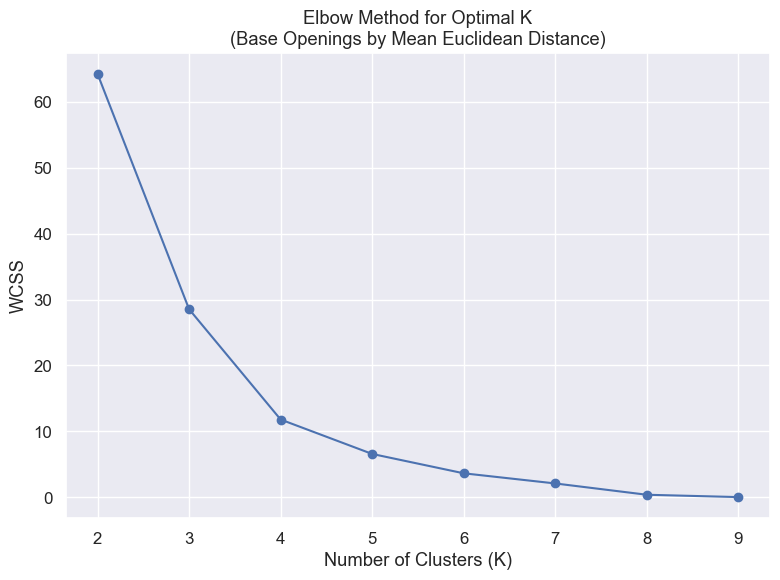

,Number of Clusters,Silhouette Score
0,2,0.548639
1,3,0.509663
2,4,0.514908
3,5,0.428137
4,6,0.323463
5,7,0.199383
6,8,0.171155
7,9,0.161760


In [56]:
if mean_distances_sorted is not None and not mean_distances_sorted.empty:
    data = mean_distances_sorted[['MeanEuclideanDistance']]
    min_clusters = 2
    max_clusters = min(10, len(data) - 1)
    wcss_vals = []
    silhouette_score_vals = {}

    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=69)
        kmeans.fit(data)
        wcss_vals.append(kmeans.inertia_)
        silhouette_score_vals[k] = silhouette_score(data, kmeans.labels_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters, max_clusters + 1), wcss_vals, marker='o')
    plt.title('Elbow Method for Optimal K\n(Base Openings by Mean Euclidean Distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.xticks(range(min_clusters, max_clusters + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    table_of_silhouette_scores = pd.DataFrame.from_dict(
        silhouette_score_vals, columns=['Silhouette Score'], orient='index'
    ).reset_index().rename(columns={'index': 'Number of Clusters'})
    display(table_of_silhouette_scores)
else:
    print('No mean_distances data available; skipping K-means optimisation.')

### Implementation of K-Means Clustering (by Mean Distance)

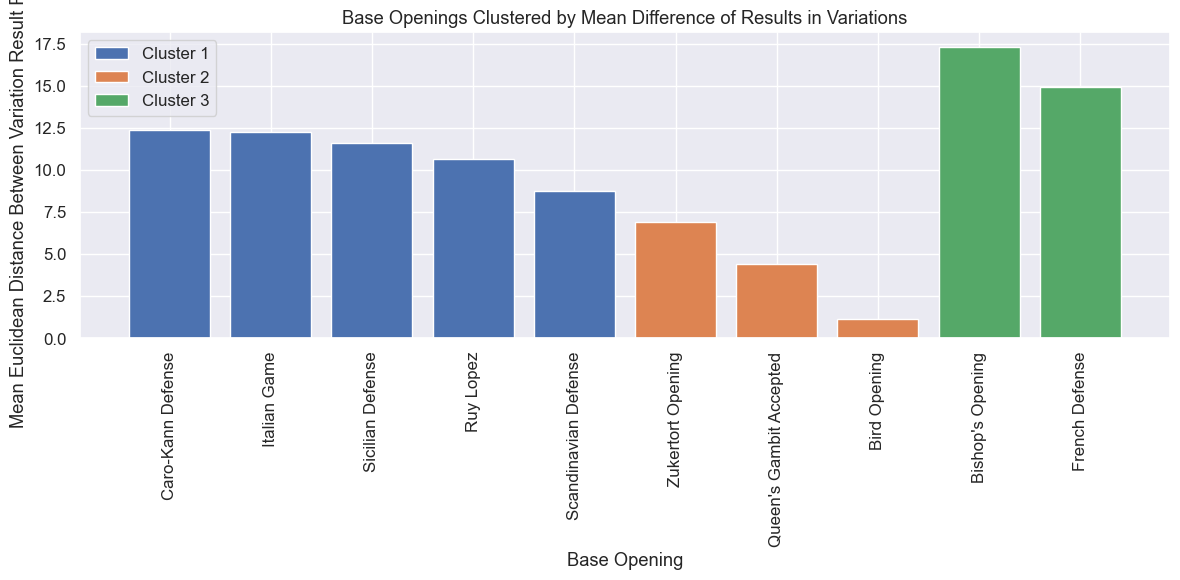

Silhouette Score: 0.5097
WCSS: 28.53


In [57]:
if mean_distances_sorted is not None and not mean_distances_sorted.empty:
    data = mean_distances_sorted[['MeanEuclideanDistance']].copy()
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=69)
    kmeans.fit(data)
    kmeans_silhouette_score = silhouette_score(data, kmeans.labels_)
    kmeans_wcss = kmeans.inertia_

    data['Cluster'] = kmeans.labels_
    mean_distances_sorted_clusters = mean_distances_sorted.merge(
        data['Cluster'], left_index=True, right_index=True, how='left'
    )
    mean_distances_sorted_clusters = mean_distances_sorted_clusters.dropna(subset=['MeanEuclideanDistance'])

    plt.figure(figsize=(12, 6))
    for i in range(3):
        cluster_data = mean_distances_sorted_clusters[
            mean_distances_sorted_clusters['Cluster'] == i
        ]
        plt.bar(
            cluster_data['BaseOpening'],
            cluster_data['MeanEuclideanDistance'],
            label=f'Cluster {i + 1}',
        )
    plt.title('Base Openings Clustered by Mean Difference of Results in Variations')
    plt.xlabel('Base Opening')
    plt.ylabel('Mean Euclidean Distance Between Variation Result Profiles')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f'Silhouette Score: {kmeans_silhouette_score:.4f}')
    print(f'WCSS: {kmeans_wcss:.2f}')
else:
    print('No mean_distances data available; skipping final K-means clustering.')